In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps, odeint
from scipy.optimize import bisect

In [3]:
W = [0,0.01]
r = np.linspace(0.001,30,1000)
rr = r[::-1]
l = 1
fact = 13.6

In [4]:

def f(W,r,E,l):
    u, z = W
    f1 = z
    f2 = ((l*(l+1))/r**2 -2/r - E)*u
    return [f1,f2]

def shoot(E):
    sol = odeint(f,W,rr,args=(E,l,))
    return sol[:,0][-1]

Energies = np.arange(-2,0, 0.001)
hits = [shoot(e) for e in Energies]

In [5]:
Roots = []          #Creating an empty array for the assumption of the Roots(i.e. Energy of Eigen-state)
for i in range(1,len(Energies)):
    e1 = Energies[i-1]
    e2 = Energies[i]
    if shoot(e1)*shoot(e2)<0:   #if the function crosses the X axis between e1 and e2 then the function will switch sign in between
        Roots.append([e1,e2])   #adding the intervals to the array
Roots = np.array(Roots) 
print(Roots)
n = np.shape(Roots)[0]          #Number of eigen-states to be displayed

[[-0.25  -0.249]
 [-0.111 -0.11 ]
 [-0.052 -0.051]]


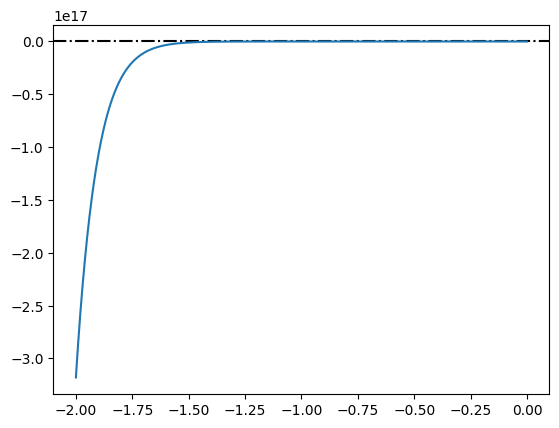

In [6]:
plt.axhline(linestyle = '-.',color = 'black')
plt.plot(Energies,hits)

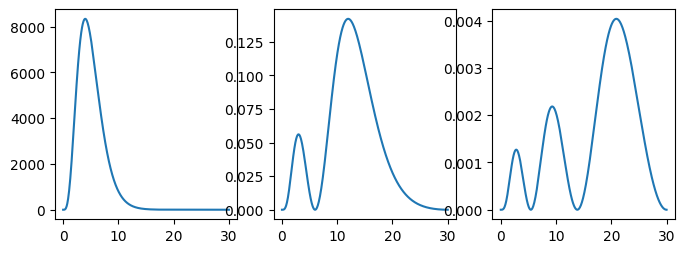

In [7]:
eps = np.zeros(n)   #Array for the energy eigen values
for i in range(n):
    eps[i] = bisect(shoot,Roots[i][0], Roots[i][1])     #Finding the energy of the Eigen-states from the basic assumptions using Bisection technique

E_n = fact*eps      #Energies of the Eigen-states in S.I. unit

plt.figure(figsize=(8,6))
Y_n = np.zeros((n,len(rr)))
for i in range(n):
    solution = odeint(f,W,rr,args=(eps[i],l,)) 
    Y_n[i,:] = solution[:,0]
    plt.subplot(2,3,i+1)
    plt.plot(rr,(Y_n[i])**2)

In [8]:
print("Energies of The Eigen-States are: \n")
for i in range(len(E_n)):
    e = E_n[i]
    print("psi_{}(x) : {} eV".format(i,e))

Energies of The Eigen-States are: 

psi_0(x) : -3.3999999020945415 eV
psi_1(x) : -1.5088186107678694 eV
psi_2(x) : -0.7048602381869529 eV
